In [1]:
import pathlib, json, pandas as pd

# 1)  Point to the **exact** folder you showed
DATA_DIR = pathlib.Path(
    "/home/mann-gandhi/Downloads/my_spotify_data/Spotify Extended Streaming History"
)

# 2)  Grab every .json file in there
json_files = sorted(DATA_DIR.glob("*.json"))
print("Found:", len(json_files), "files")

# 3)  Load them all into one big list of dicts
records = []
for f in json_files:
    with open(f) as fp:
        records.extend(json.load(fp))

# 4)  Make a DataFrame
df = pd.DataFrame.from_records(records)
print("Total streams:", len(df))

Found: 12 files
Total streams: 172943


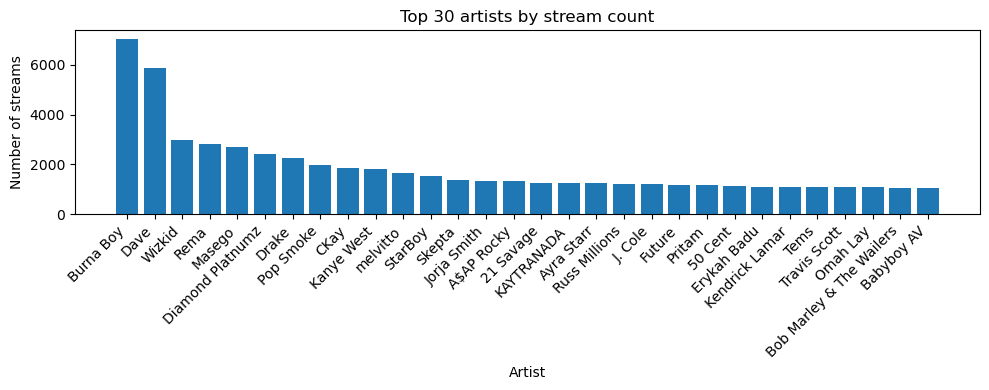

In [2]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Count streams per artist and sort descending
# ------------------------------------------------------------------
artist_counts = (
    df['master_metadata_album_artist_name']        # artist column
      .fillna('Unknown')                           # safety for missing tags
      .value_counts()
      .sort_values(ascending=False)
)

# OPTIONAL: keep only the top N artists to avoid a crowded plot
N = 30
artist_counts = artist_counts.head(N)

# ------------------------------------------------------------------
# 2)  Bar plot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 4))                        # widen for long names
plt.bar(artist_counts.index, artist_counts.values)

plt.xlabel("Artist")
plt.ylabel("Number of streams")
plt.title(f"Top {N} artists by stream count")
plt.xticks(rotation=45, ha='right')                # rotate labels for clarity
plt.tight_layout()
plt.show()


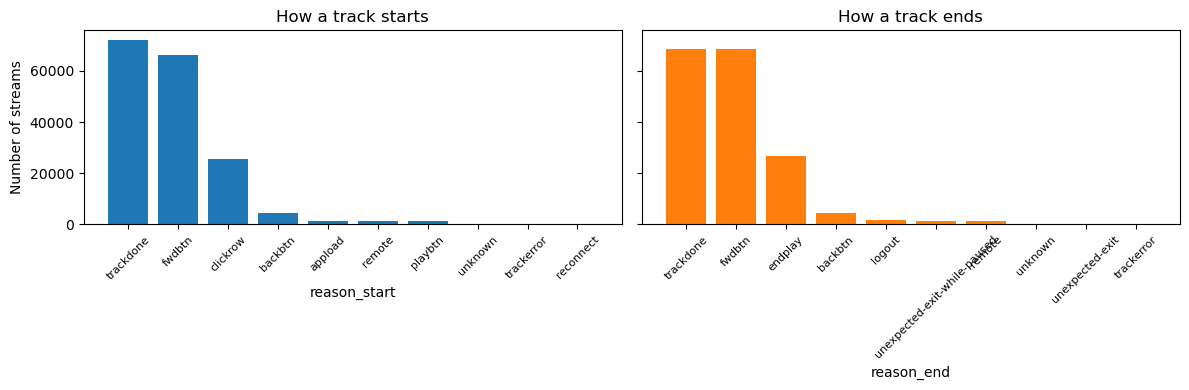

In [3]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Frequency tables
# ------------------------------------------------------------------
start_counts = (
    df['reason_start']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
)

end_counts = (
    df['reason_end']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
)

# ------------------------------------------------------------------
# 2)  Plot: two bar charts side-by-side
# ------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# --- reason_start --------------------------------------------------
axes[0].bar(start_counts.index, start_counts.values)
axes[0].set_title("How a track starts")
axes[0].set_xlabel("reason_start")
axes[0].set_ylabel("Number of streams")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# --- reason_end ----------------------------------------------------
axes[1].bar(end_counts.index, end_counts.values, color="tab:orange")
axes[1].set_title("How a track ends")
axes[1].set_xlabel("reason_end")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()


In [4]:
# --- totals ----------------------------------------------------------
total_ms_played = df['ms_played'].sum()
total_hours     = total_ms_played / 1000 / 3600    # convenient extra

print(f"Total listening time : {total_ms_played:,} ms  ≈ {total_hours:.1f} hours")

# --- unique artists --------------------------------------------------
num_artists = df['master_metadata_album_artist_name'].nunique(dropna=True)
print(f"Different artists     : {num_artists:,}")

# --- unique tracks ---------------------------------------------------
num_tracks  = df['master_metadata_track_name'].nunique(dropna=True)
print(f"Different tracks      : {num_tracks:,}")


Total listening time : 16,812,478,223 ms  ≈ 4670.1 hours
Different artists     : 5,510
Different tracks      : 13,782


master_metadata_album_artist_name
Burna Boy                   14053.5
Dave                        13333.7
Rema                         6198.1
Wizkid                       5929.8
Masego                       5799.2
Diamond Platnumz             4626.6
CKay                         3666.5
StarBoy                      3659.6
Kanye West                   3490.2
Drake                        3206.5
Jorja Smith                  3098.0
melvitto                     3023.7
Pop Smoke                    2934.2
Erykah Badu                  2891.9
Russ Millions                2389.7
KAYTRANADA                   2356.2
Skepta                       2331.0
21 Savage                    2276.7
Patoranking                  2184.5
Ayra Starr                   2163.7
Major Lazer                  2110.2
Babyboy AV                   2107.1
The Roots                    2080.9
Travis Scott                 2071.8
Pritam                       2060.4
Kendrick Lamar               1983.5
Davido                       1

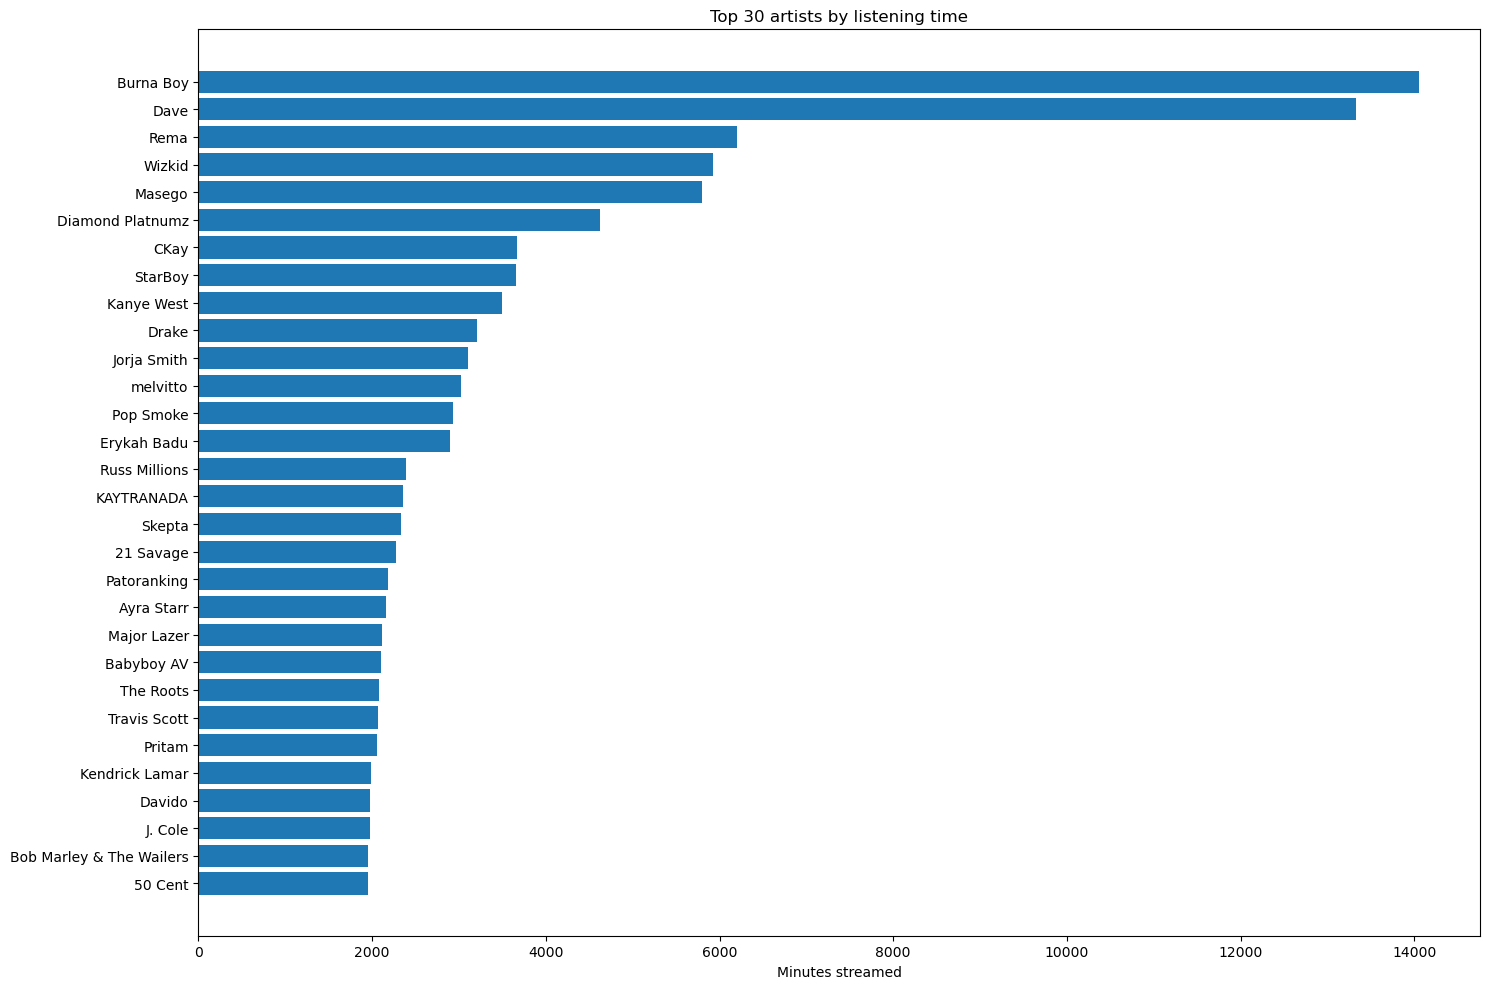

In [5]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  Total listening time (minutes) for each artist
# ------------------------------------------------------------------
artist_minutes = (
    df.groupby('master_metadata_album_artist_name')['ms_played']
      .sum()                      # milliseconds ⇒ total per artist
      .div(1000 * 60)             # convert ms → minutes
      .sort_values(ascending=False)
)

# ------------------------------------------------------------------
# 2)  Inspect / print the top artists
# ------------------------------------------------------------------
TOP_N = 30
print(artist_minutes.head(TOP_N).round(1))     # 1-decimal precision

# ------------------------------------------------------------------
# 3)  Simple horizontal bar chart
# ------------------------------------------------------------------
topN = artist_minutes.head(TOP_N)

plt.figure(figsize=(15, 10))
plt.barh(topN.index[::-1], topN.values[::-1])  # reverse for biggest at top
plt.xlabel("Minutes streamed")
plt.title(f"Top {TOP_N} artists by listening time")
plt.tight_layout()
plt.show()


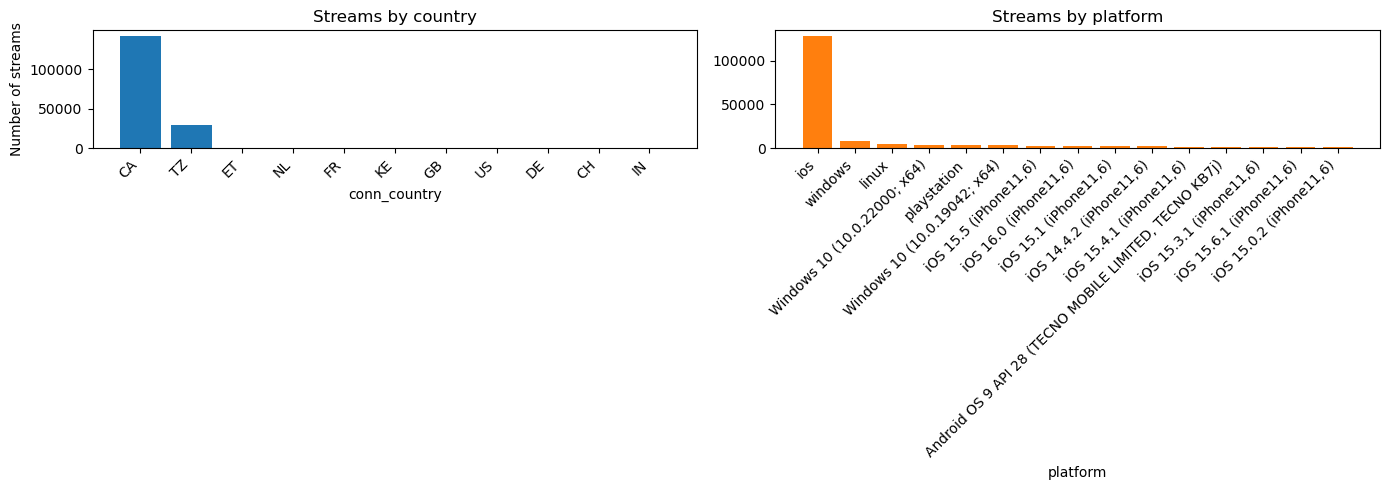

In [6]:
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1)  Frequency tables
# ---------------------------------------------------------------
country_counts  = (
    df['conn_country']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
      .head(15)                     # top N to keep the axis readable
)

platform_counts = (
    df['platform']
      .fillna('Unknown')
      .value_counts()
      .sort_values(ascending=False)
      .head(15)
)

# ---------------------------------------------------------------
# 2)  Plot
# ---------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# --- Countries ---------------------------------------------------
axes[0].bar(country_counts.index, country_counts.values)
axes[0].set_title("Streams by country")
axes[0].set_xlabel("conn_country")
axes[0].set_ylabel("Number of streams")
axes[0].tick_params(axis='x', rotation=45)         # angle only
plt.setp(axes[0].get_xticklabels(), ha='right')    # alignment

# --- Platforms ---------------------------------------------------
axes[1].bar(platform_counts.index, platform_counts.values, color="tab:orange")
axes[1].set_title("Streams by platform")
axes[1].set_xlabel("platform")
axes[1].tick_params(axis='x', rotation=45)
plt.setp(axes[1].get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()
